# Preamble
This is our first data science project. We learned a lot due to this project, whether it's in python or in the area of data science. The biggest part in such projects is the data preparation and cleansing. As well as in every other data science project, we spend a lot of time here until we came to the most fun part, the model building and prediction. We tried and errored different approaches during the data preparation, read about better ways and worse ways to do it. We sometimes used the long way to get a better understanding of how the data has to be prepared instead of using the short and faster approach. The main goal of this project is to show some ways of data preparation as well as predict the delay of a flight based on his input features. Therefore we needed to prepare and create data, which will be handled in the first chapter “Data Analysis and Preprocessing”. There we will give an overview of the data structure and the data condition as well. The next chapter then, will contain the “Feature and Label Selection” were especially the features will be determined by different feature selections approaches. According to the goal of predicting the delay, the target of this essay is the flight delay at arrival. To determine the target we use the Random Forest Regression approach. The amount of 5 million flights is quite a lot for the computation time, therefore we will slice smaller size datasets and use them for prediction.

We would be very pleased for any feedback on this project and the coding ways. So feel free to leave some comments. It's our first project and it can only get better. We are looking forward to your feedback and a upvote if liked it. 
Thanks a lot. 


# Imports
Library Imports and Helpers

In [1]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

import statsmodels.formula.api as sm

#importing seaborn for statistical plots
import seaborn as sns

import datetime
import time
from time import strftime, gmtime

import statsmodels.formula.api as smf
#maschine learning libraries
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from random import sample

# CSV-File Import

In [3]:
df_flights=pd.read_csv("flights.csv")

# Data Analysis and Preprocessing
The following is the first overview of all attributes:

In [4]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
YEAR                   int64
MONTH                  int64
DAY                    int64
DAY_OF_WEEK            int64
AIRLINE                object
FLIGHT_NUMBER          int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               int64
CANCELLED              int64
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT

There is a need to convert them all to datetime. In addition, it seems to be helpful to write/use a function for this conversion. (Thanks to fabiendaniel and her great tutorial here ):

In [5]:
# converting input time value to datetime.
def conv_time(time_val):
    if pd.isnull(time_val):
        return np.nan
    else:
            # replace 24:00 o'clock with 00:00 o'clock:
        if time_val == 2400: time_val = 0
            # creating a 4 digit value out of input value:
        time_val = "{0:04d}".format(int(time_val))
            # creating a time datatype out of input value: 
        time_formatted = datetime.time(int(time_val[0:2]), int(time_val[2:4]))
    return time_formatted

In [6]:
df_flights['ARRIVAL_TIME'] = df_flights['ARRIVAL_TIME'].apply(conv_time)
df_flights['DEPARTURE_TIME'] = df_flights['DEPARTURE_TIME'].apply(conv_time)
df_flights['SCHEDULED_DEPARTURE'] = df_flights['SCHEDULED_DEPARTURE'].apply(conv_time)
df_flights['WHEELS_OFF'] = df_flights['WHEELS_OFF'].apply(conv_time)
df_flights['WHEELS_ON'] = df_flights['WHEELS_ON'].apply(conv_time)
df_flights['SCHEDULED_ARRIVAL'] = df_flights['SCHEDULED_ARRIVAL'].apply(conv_time)

The required data has now the correct format.

# Handling the Null Values
After I converted the necessary time values to a DateTime datatype, I need to check our data according to its integrity. Null values or missing data are often occurring data states that need to be handled.

In addition to several other methods, I will focus on two or three methods in this notebook to deal with null value data or missing data.

One option is to delete the corresponding rows.

Another case of handling missing or null value data is to reconstruct the missing data according to information from other columns. Imagine there is a start and an end time and only the duration is missing. You could calculate the missing values simply by the difference between end time and start time. Accordingly, you do not have to delete the data column but you can continue to use the information contained in it.

One of the best ways to handle missing or null value data is the imputation. The imputation will fill the missing gaps with some numbers that are based on existing data columns. The numbers are not as accurate as the real data but fits the needs for the most prediction models and lead to a better resolution of the model.

In [7]:
df_flights.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [8]:
df_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,00:05:00,...,04:08:00,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,00:10:00,...,07:41:00,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,00:20:00,...,08:11:00,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,00:20:00,...,07:56:00,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,00:25:00,...,02:59:00,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Reconstruct Data Manually
Our null analysis above shows the following features with a lot of null values:

- CANCELLATION_REASON
- AIR_SYSTEM_DELAY
- SECURITY_DELAY
- AIRLINE_DELAY
- LATE_AIRCRAFT_DELAY
- WEATHER_DELAY

In this case here, I try to determine or "calculate" the data by deriving the situation. Look at the values that are mostly empty according to the coherent afford of an airline to not be the reason for a delay. Therefore the missing data (or Not-a-Number data) is not based on a bad data quality, it is more the fact that it didn't happen any action by these delay features. You can prove it by looking at a tuple of one of that features when there is at least one feature triggered, all the other features are "initialized" with "0.0":

In [9]:
df_flights['AIRLINE_DELAY'] = df_flights['AIRLINE_DELAY'].fillna(0)
df_flights['AIR_SYSTEM_DELAY'] = df_flights['AIR_SYSTEM_DELAY'].fillna(0)
df_flights['SECURITY_DELAY'] = df_flights['SECURITY_DELAY'].fillna(0)
df_flights['LATE_AIRCRAFT_DELAY'] = df_flights['LATE_AIRCRAFT_DELAY'].fillna(0)
df_flights['WEATHER_DELAY'] = df_flights['WEATHER_DELAY'].fillna(0)

So it's ok to transform the NAN-data to the value "0.0" because there was no impact on the flight by these data that causes a delay.

Null values have now decreased significantly. There are only a few attributes left. Particular striking, however, is the CANCELLATION_REASON that hits the high mark with around 98% null values. We need to take a closer look at the cancellation data.

# Dealing with Null Values in Categorical Data

In [10]:
df_flights.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY             0
SECURITY_DELAY               0
AIRLINE_DELAY                0
LATE_AIRCRAFT_DELAY          0
WEATHER_DELAY                0
dtype: int64

    The reason for cancellation of flights splits into the following occurrences:

    A - Airline/Carrier
    B - Weather
    C - National Air System
    D - Security
    ... and has the following ratio:

In [11]:
# group by CANCELLATION_REASON to see the ration
df_flights['CANCELLATION_REASON'].value_counts()

B    48851
A    25262
C    15749
D       22
Name: CANCELLATION_REASON, dtype: int64

As you can see the main reason for cancelation is B the weather. It is well known that the weather is often the cause of delays and cancelations. In the case of this attribute, we look at the weather as a cancelation reason, not a delay reason. Now there is the following question: If we want to predict delay times from departure flights, is it necessary to include flight cancellation reasons in our calculation? Don't we want to focus only on not canceled flights, on flights with a departure and a (late) arrival time? The answer is: No, we want them all! We don't want to lose data for our prediction. Every information, in this case, is important. For example cancellation reason "Weather" for a canceled flight. The flight themselves did not take place, that's right, but what about the consequences of the canceled flights? All the passengers need to get to their destinations, therefore they will be booked on the next flight or moreover the canceled flight will start in another timeshift and will probably block another's plains flight slot. That all leads to a knock-on effect on other flights.

"Manuell" Conversion of categories to numeric values
Most models don't work pretty good with categorical values. They need to be converted into numeric values to use a prediction model. There is a way to convert all categorical data into numeric values, its called One-Hot Encoding. This approach will line in all categorical values in separate columns, creates a new column and matches every occurrence of the categorical value with 1 or 0 for non-occurrences. You should take a deeper look into it

Another approach that is similar to the One-Hot encoding approach is included in the Pandas library and is called get_dummies(). This function converts categorical values into dummy/indicator values as well. In this case, all null value data are also converted and filled with 0 values. Nevertheless, in this case and according to the small amount of four categorical values, I will convert the CANCELLATION_REASON manually. The final result will be the following:

NaN = 0
A = 1
B = 2
C = 3
D = 4

In [12]:
# -------------------------------------
# converting categoric value to numeric
df_flights.loc[df_flights['CANCELLATION_REASON'] == 'A', 'CANCELLATION_REASON'] = 1
df_flights.loc[df_flights['CANCELLATION_REASON'] == 'B', 'CANCELLATION_REASON'] = 2
df_flights.loc[df_flights['CANCELLATION_REASON'] == 'C', 'CANCELLATION_REASON'] = 3
df_flights.loc[df_flights['CANCELLATION_REASON'] == 'D', 'CANCELLATION_REASON'] = 4

# -----------------------------------
# converting NaN data to numeric zero
df_flights['CANCELLATION_REASON'] = df_flights['CANCELLATION_REASON'].fillna(0)

In [13]:
df_flights.isnull().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER             14721
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          86153
DEPARTURE_DELAY         86153
TAXI_OUT                89047
WHEELS_OFF              89047
SCHEDULED_TIME              6
ELAPSED_TIME           105071
AIR_TIME               105071
DISTANCE                    0
WHEELS_ON               92513
TAXI_IN                 92513
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            92513
ARRIVAL_DELAY          105071
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON         0
AIR_SYSTEM_DELAY            0
SECURITY_DELAY              0
AIRLINE_DELAY               0
LATE_AIRCRAFT_DELAY         0
WEATHER_DELAY               0
dtype: int64

Good to know how to calculate this values, bad is the fact that the values to calculate these times are also NaN - data. That is probably the reason for its initial NaN - data value. I have no choice but to declare the data as outliers.

In [14]:
# drop the last 1% of missing data rows.
df_flights = df_flights.dropna(axis=0)

In [15]:
df_flights.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

# Analyzing Distribution after Cleansing, Conversion and Preprocessing


### Feature and Label Selection
For our prediction, I now need to identify the features that are most likely to impact on the flight delays.

First I want to include the airports and try to figure out whether there is an impact on the delay regarding the departure airport or not. For this, I will include the airports from another file in this evaluation. With the included information about the location of the airport, I could identify regions on the map that support a delay.

First, I will include the airlines in the evaluation to get a distribution of the delays per airline. Later I will add the airports and their location data to the evaluation to get a closer view of the map and some location-based delays.

Merging the Airline Codes (IATA-Codes)
I am going to merge the IATA-Airline codes from the other .csv-file.



In [16]:
df_airlines = pd.read_csv('airlines.csv')
df_airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [17]:
# joining airlines
df_flights = df_flights.merge(df_airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

In [18]:
# dropping old column and rename new one
df_flights = df_flights.drop(['AIRLINE_x','IATA_CODE'], axis=1)
df_flights = df_flights.rename(columns={"AIRLINE_y":"AIRLINE"})

# Analyzing the proportion of flights with respect to the companies.

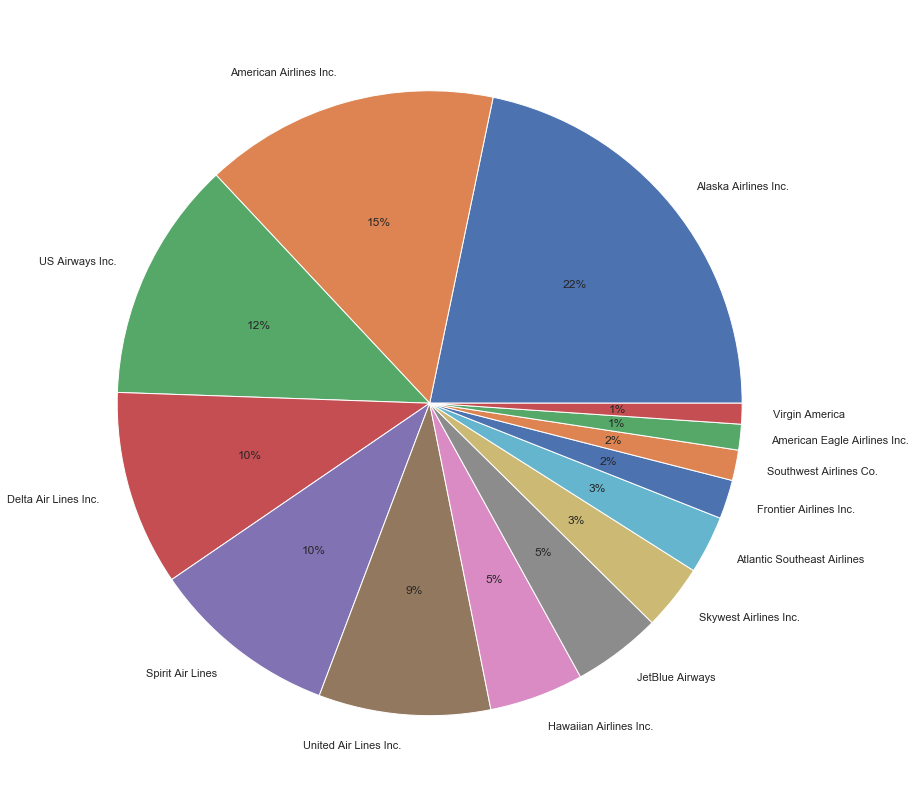

In [130]:
fig_dim = (14,18)
f, ax = plt.subplots(figsize=fig_dim)
quality=df_flights["AIRLINE"].unique()
size=df_flights["AIRLINE"].value_counts()

plt.pie(size,labels=quality,autopct='%1.0f%%')
plt.show()

# Analyzing the Delays by Airline
Getting an overview of delays by airlines companies.

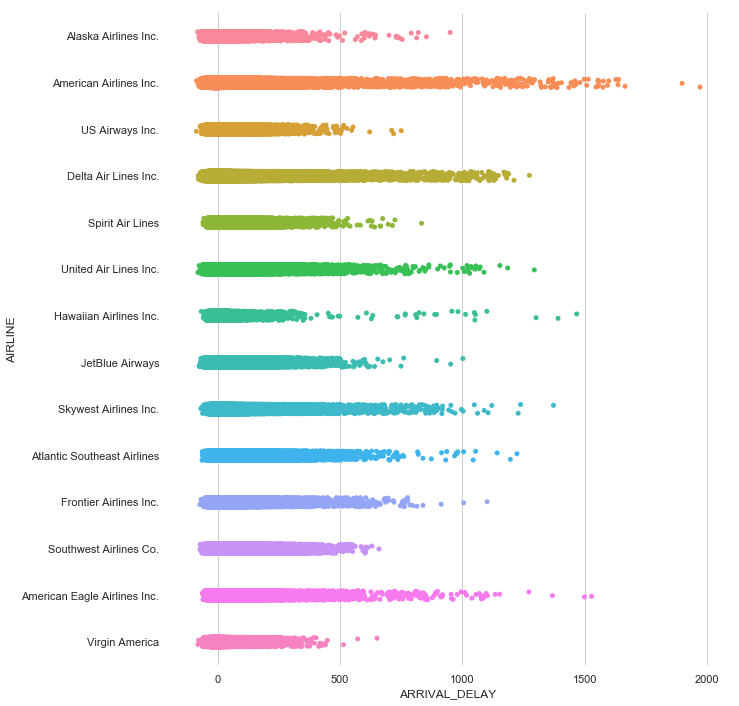

In [115]:
sns.set(style="whitegrid")

# initialize the figure
fig_dim = (10,12)
f, ax = plt.subplots(figsize=fig_dim)
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",
              data=df_flights, dodge=True, jitter=True
            )
plt.show()

The distribution above shows the airlines in comparison to their ARRIVAL_DELAYs. It clearly shows that American Airlines has a wide spread of delays. By contrast, the airline with the most entries is Southwest Airlines and their delays look pretty low compared to the American Airlines delays. I will elaborate on this in the following:

In [20]:
# Group by airline and sum up / count the values
df_flights_grouped_sum = df_flights.groupby('AIRLINE', as_index= False)['ARRIVAL_DELAY'].agg('sum').rename(columns={"ARRIVAL_DELAY":"ARRIVAL_DELAY_SUM"})
df_flights_grouped_cnt = df_flights.groupby('AIRLINE', as_index= False)['ARRIVAL_DELAY'].agg('count').rename(columns={"ARRIVAL_DELAY":"ARRIVAL_DELAY_CNT"})

# Merge the two groups together
df_flights_grouped_delay = df_flights_grouped_sum.merge(df_flights_grouped_cnt, left_on='AIRLINE', right_on='AIRLINE', how='inner')
# Calculate the average delay per airline
df_flights_grouped_delay.loc[:,'AVG_DELAY_AIRLINE'] = df_flights_grouped_delay['ARRIVAL_DELAY_SUM'] / df_flights_grouped_delay['ARRIVAL_DELAY_CNT']

df_flights_grouped_delay.sort_values('ARRIVAL_DELAY_SUM', ascending=False)

,AIRLINE,ARRIVAL_DELAY_SUM,ARRIVAL_DELAY_CNT,AVG_DELAY_AIRLINE
9,Southwest Airlines Co.,5435468.0,1242403,4.374964
3,Atlantic Southeast Airlines,3653252.0,554752,6.585379
8,Skywest Airlines Inc.,3371854.0,576814,5.845652
12,United Air Lines Inc.,2757957.0,507762,5.431594
1,American Airlines Inc.,2460604.0,712935,3.451372
2,American Eagle Airlines Inc.,1800397.0,278791,6.457873
7,JetBlue Airways,1749880.0,262042,6.677861
10,Spirit Air Lines,1667050.0,115193,14.471800
5,Frontier Airlines Inc.,1126549.0,90090,12.504706
11,US Airways Inc.,719831.0,194223,3.706209


In conclusion, Southwest Airlines has a lot of mostly smaller delays which are in total the high mark of delays in this evaluation. On the other side and with a hint on our distribution chart above, American Airlines has a lot of huge delays in single flights which effects the total delay of the airline. They are in the upper thirds of the delays but their mean delay per airline is one of the lowest of all airlines.

# Feature Correlation
So let us look at the correlation between each of the features ( and the label as well). This might be the first step into a closer feature selection. The main goal is to identify the features that affect the ARRIVAL_DELAY in a positive or negative way.

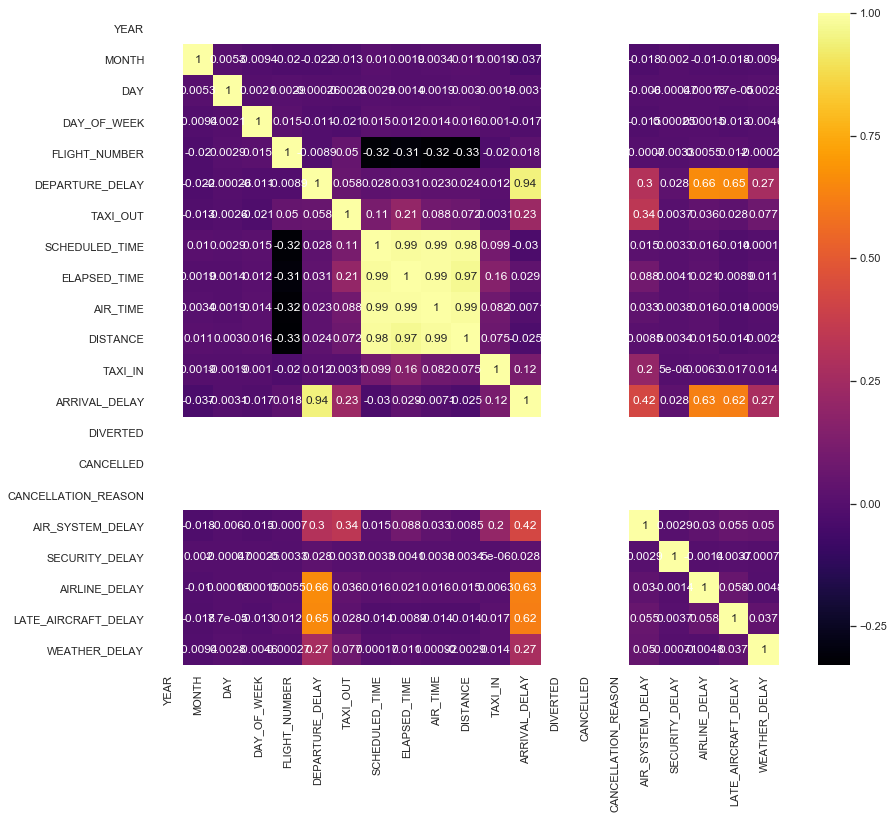

In [23]:
# Dataframe correlation
del_corr = df_flights.corr()

# Draw the figure
f, ax = plt.subplots(figsize=(14, 12))

# Draw the heatmap
sns.heatmap(del_corr,annot=True,cmap='inferno')
plt.show()

# Results from Correlation Matrix
I am dividing the different correlations into two parts, the positive correlations (higher than 0.6 ) and the less positive correlations (less than 0.6 but higher than 0.2). The results are listed in the list below:

    Positive correlations between:
        DEPARTURE_DELAY and
        ARRIVAL_DELAY
        LATE_AIRCRAFT_DELAY
        AIRLINE_DELAY
        ARRIVAL_DELAY and
        DEPARTURE_DELAY
        LATE_AIRCRAFT_DELAY
        AIRLINE_DELAY
    Less positive correlations between:
        ARRIVAL_DELAY and
        AIR_SYSTEM_DELAY
        WEATHER_DELAY
        DEPARTURE_DELAY and
        AIR_SYSTEM_DELAY
        WEATHER_DELAY
        TAXI_OUT and
        AIR_SYSTEM_DELAY
        ELAPSED_TIME

In [24]:
df_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE
0,2015,1,1,4,98,N407AS,ANC,SEA,00:05:00,23:54:00,...,-22.0,0,0,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.
1,2015,1,1,4,135,N527AS,SEA,ANC,00:25:00,00:24:00,...,-21.0,0,0,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.
2,2015,1,1,4,108,N309AS,ANC,SEA,00:45:00,00:41:00,...,-14.0,0,0,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.
3,2015,1,1,4,122,N413AS,ANC,PDX,00:50:00,00:46:00,...,-18.0,0,0,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.
4,2015,1,1,4,130,N457AS,FAI,SEA,01:15:00,01:07:00,...,-3.0,0,0,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.


In [110]:
# Marking the delayed flights
df_flights['DELAYED'] = df_flights.loc[:,'ARRIVAL_DELAY'].values > 0

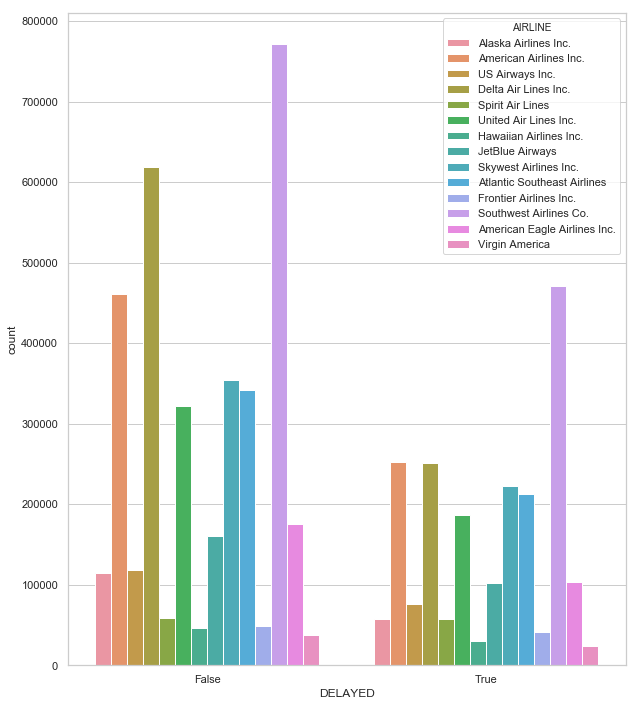

In [113]:
figsize=plt.subplots(figsize=(10,12))
sns.countplot(x='DELAYED',hue='AIRLINE',data=df_flights)
plt.show()

# Feature Selection with Machine Learning Algorithms

In [26]:
# Label definition
y = df_flights.DELAYED

# Choosing the predictors
feature_list_s = [
    'LATE_AIRCRAFT_DELAY'
    ,'AIRLINE_DELAY'
    ,'AIR_SYSTEM_DELAY'
    ,'WEATHER_DELAY'
    ,'ELAPSED_TIME']

# New dataframe based on a small feature list
X_small = df_flights[feature_list_s]

In [27]:
# RandomForestClassifier with 10 trees and fitted on the small feature set 
clf = RandomForestClassifier(n_estimators = 10, random_state=32) 
clf.fit(X_small, y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=32, verbose=0, warm_start=False)

In [28]:
importances=clf.feature_importances_
importances=pd.DataFrame([X_small.columns,importances]).transpose()
importances.columns=[['Variables','Importance']]
importances

,Variables,Importance
0,LATE_AIRCRAFT_DELAY,0.261898
1,AIRLINE_DELAY,0.331247
2,AIR_SYSTEM_DELAY,0.374424
3,WEATHER_DELAY,0.0224567
4,ELAPSED_TIME,0.00997351


A ittle bit has changed. Now the AIR_SYSTEM__DELAY has got the most influences on a flight that has been delayed. This feature had a less positive correlation in our correlation resume above. All the other features have remained in the same order of importance as we have found out. Let us try a wider range with the same model. And please keep in mind that we use a classification here. We have classified the data into delayed and not delayed data and want to find out now which of these features effects a delay of a flight the most. There could be and there probably will be different features for a flight that arrives just in time, but this will be part of a later section where we try to determine the actual arrival at an airport.

In following, I want to proof the above written down feature correlation count with a machine learning algorithms. Do they really correlate as good as I think with the ARRIVAL_DELAY? I will classify the data into delayed and not delayed data and define a label (DELAYED) for that in the dataframe. Afterward I will show the feature importance for the given attributes.

In the beginning, I need to reduce computation time by reducing the data ,so choose a Random Sample of 50000 records. Otherwise, this whole prediction will execute too long.

In [30]:
# choosing the predictors
feature_list = [
    'YEAR'
    ,'MONTH'
    ,'DAY'
    ,'LATE_AIRCRAFT_DELAY'
    ,'AIRLINE_DELAY'
    ,'AIR_SYSTEM_DELAY'
    ,'WEATHER_DELAY'
    ,'ELAPSED_TIME'
    ,'DEPARTURE_DELAY'
    ,'SCHEDULED_TIME'
    ,'AIR_TIME'
    ,'DISTANCE'
    ,'TAXI_IN'
    ,'TAXI_OUT'
    ,'DAY_OF_WEEK'
    ,'SECURITY_DELAY'
]
# Any number can be used in place of '0'. 
import random
random.seed(0)
    
df_flights_1=df_flights.sample(n=50000)
X = df_flights_1[feature_list]


In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 3031533 to 5305831
Data columns (total 16 columns):
YEAR                   50000 non-null int64
MONTH                  50000 non-null int64
DAY                    50000 non-null int64
LATE_AIRCRAFT_DELAY    50000 non-null float64
AIRLINE_DELAY          50000 non-null float64
AIR_SYSTEM_DELAY       50000 non-null float64
WEATHER_DELAY          50000 non-null float64
ELAPSED_TIME           50000 non-null float64
DEPARTURE_DELAY        50000 non-null float64
SCHEDULED_TIME         50000 non-null float64
AIR_TIME               50000 non-null float64
DISTANCE               50000 non-null int64
TAXI_IN                50000 non-null float64
TAXI_OUT               50000 non-null float64
DAY_OF_WEEK            50000 non-null int64
SECURITY_DELAY         50000 non-null float64
dtypes: float64(11), int64(5)
memory usage: 6.5 MB


In [33]:
y = df_flights_1.DELAYED

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import scale
X_train=scale(X_train)
X_test=scale(X_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


In [35]:
model=LinearRegression()
model=model.fit(X_train,y_train)
slope=model.coef_
coef=model.intercept_
print(slope.flatten())
print(coef)

[ 0.00000000e+00 -6.61931595e-03 -7.28236060e-04 -6.84282846e-01
 -7.16071374e-01 -3.57666232e-01 -2.54458612e-01  1.09527012e+00
  1.28470463e+00 -2.14559175e+00  1.09550720e+00 -7.84581441e-02
  1.01792194e-01  1.73166067e-01  6.07316917e-03 -1.11471027e-02]
0.36772499999999997


In [36]:
y_pred=model.predict(X_train)

In [37]:
r2_score(y_train,y_pred)

0.6000830488385647

Stepwise Regression
Stepwise regression is where we select the features to be used in a model on the basis of variable importance.

Variables are sequentially selected and a model is built starting with one variable. In the next model another variable is added and the adjusted R2 for both the models are compared. If the adjusted R2 increases the next variable is added. This process is repeated till there is a decrease in the adjusted R2 The above process is known as forward selection.

For this purpose we can use the mlextend library

In [83]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression

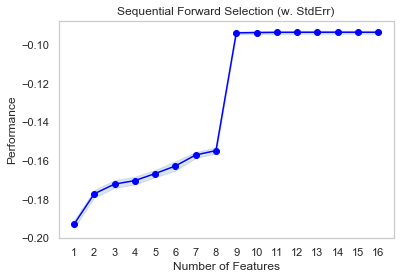

In [84]:
lr = LinearRegression()
sfs = SFS(lr, k_features='best', forward=True, floating=False, 
          scoring='neg_mean_squared_error', cv=10)
model = sfs.fit(X_train, y_train)

fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [85]:
print('Selected features:', sfs.k_feature_idx_)

Selected features: (1, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15)


Similarly backward elimination can also be performed on the same data

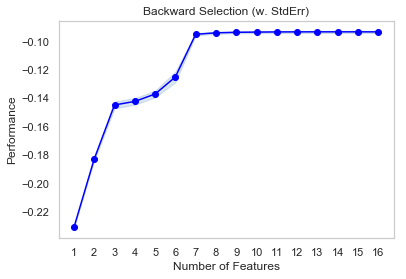

In [86]:
lr = LinearRegression()
sfs2 = SFS(lr, k_features='best', forward=False, floating=False, 
          scoring='neg_mean_squared_error', cv=10)
model = sfs2.fit(X_train, y_train)

fig = plot_sfs(sfs2.get_metric_dict(), kind='std_err')

plt.title('Backward Selection (w. StdErr)')
plt.grid()
plt.show()

In [87]:
print('Selected features:', sfs2.k_feature_idx_)

Selected features: (0, 1, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15)


We can see almost all the features are importants, as they are interlinked.

We then applied the train on all the models to check which model is giving us the best accuracy.

In [38]:
from sklearn import ensemble,gaussian_process,linear_model,naive_bayes,neighbors,svm,tree

In [39]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostRegressor(),
    ensemble.BaggingRegressor(),
    ensemble.ExtraTreesRegressor(),
    ensemble.GradientBoostingRegressor(),
    ensemble.RandomForestRegressor(),
    #Nearest Neighbor
    neighbors.KNeighborsRegressor(),
    #Trees    
    tree.DecisionTreeRegressor(),
    tree.ExtraTreeRegressor()
    ]

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score,precision_score,recall_score,auc

In [96]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)
results=[]

row_index = 0
for alg in MLA:
    
    cv_results = cross_val_score(alg, X_train, y_train, cv=10)
    results.append(cv_results)
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
    
    
    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA AUC
1,BaggingRegressor,0.9557,0.7531,0.973880
4,RandomForestRegressor,0.9548,0.7457,0.972330
2,ExtraTreesRegressor,1.0000,0.6739,0.954380
3,GradientBoostingRegressor,0.6753,0.6655,0.963791
6,DecisionTreeRegressor,1.0000,0.5289,0.880630
0,AdaBoostRegressor,0.5281,0.5264,0.908368
5,KNeighborsRegressor,0.6318,0.4602,0.867517
7,ExtraTreeRegressor,1.0000,0.2992,0.826874


We can see that Bagging Regressor and Random Forest Regressor models are giving the accuracy. So we choose Rando Forest Model to predict the tune is more.

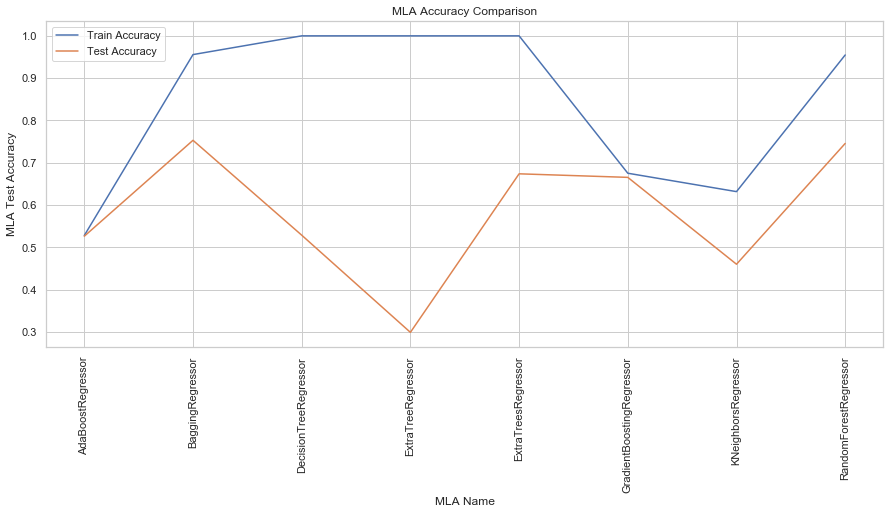

In [100]:
plt.subplots(figsize=(15,6))
sns.lineplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',label='Train Accuracy')
sns.lineplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',label='Test Accuracy')
plt.xticks(rotation=90)
plt.title('MLA Accuracy Comparison')
plt.legend()
plt.show()

The Above plot shows the test train accuracy with respect to each models.

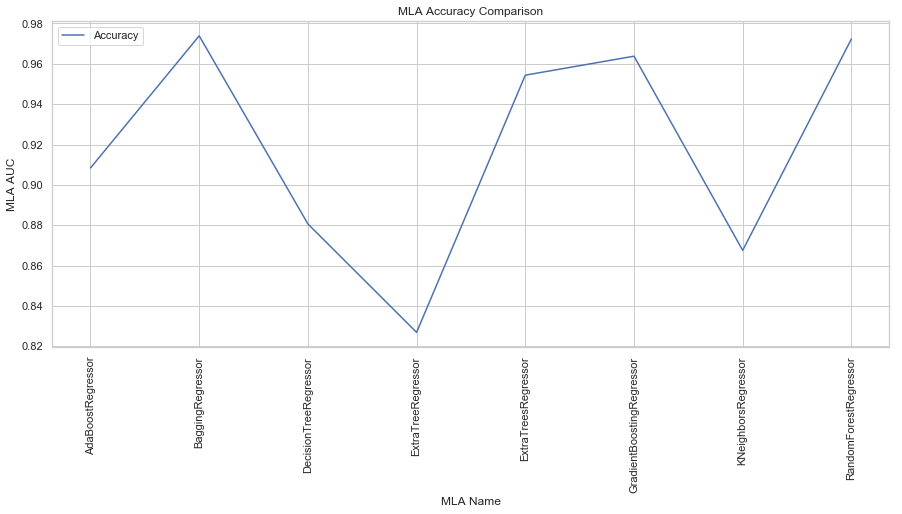

In [97]:
plt.subplots(figsize=(15,6))
sns.lineplot(x="MLA Name", y="MLA AUC",data=MLA_compare,palette='hot',label='Accuracy')

plt.xticks(rotation=90)
plt.title('MLA Accuracy Comparison')
plt.legend()
plt.show()

The Above plot shows the Accuracy score of each model, where clearlyRandom Forest and Bagging Models are giving the best accuracy.

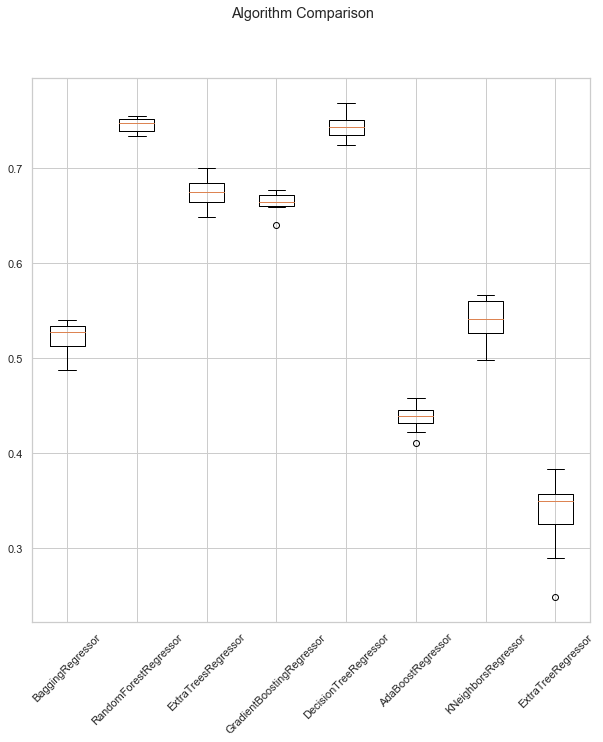

In [103]:
#sns.boxplot(MLA_compare["MLA AUC"])# boxplot algorithm comparison
fig = plt.figure(figsize=(10,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results,labels=MLA_compare['MLA Name'])
plt.xticks(rotation=45)
plt.show()

So this is basiccally the Test accuracy result of each models, where we can see Random Forest is giving us the best results,whose data is not varying much as well as it is not having any outliyers like Extra Tree ,Extra Trees and Ada Boost models.

We can see, Bagging Regressor and Randon Forrest Regressor are the two models,which gives approximately same accuracy and we can see, if we can imporve those accuracy.

# Data Prediction
    Preparing the Prediction
    Building the Model First
    I am building the model first. Here I am choosing 100 trees for the model to not overexert the computation time in later purpose.

In [44]:
# RandomForest with 100 trees
forest_model = RandomForestRegressor(n_estimators = 100, random_state=42)

# Choosing the Prediction Target
This time I choose the ARRIVAL_DELAY as the target and change the model to the Random Forest Regressor (seen above) to predict the exact minutes delayed or arrived in time.

In [47]:
y = df_flights_1.ARRIVAL_DELAY
y = np.array(y)

# Choosing the Predictors
To predict our prediction target (ARRIVAL_DELAY), we need some features. I will select the same features as in the chapter before.

In [42]:
X = np.array(X)

# Separating into Test and Train Datasets
It is necessary to separate the data into train and test dataset.

In [48]:
# split data into training and validation data, for both predictors and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [49]:
#The Shape of Train- and Testdata
print('Training Features Shape:', train_X.shape)
print('Training Labels Shape:', train_y.shape)
print('Testing Features Shape:', val_X.shape)
print('Testing Labels Shape:', val_y.shape)

Training Features Shape: (35000, 16)
Training Labels Shape: (35000,)
Testing Features Shape: (15000, 16)
Testing Labels Shape: (15000,)


# Model Training and Prediction
Establish Baseline

In [50]:
# Average arrival delay for our dataset
baseline_preds = df_flights['ARRIVAL_DELAY'].agg('sum') / df_flights['ARRIVAL_DELAY'].agg('count') 

# Baseline error by average arrival delay 
baseline_errors = abs(baseline_preds - val_y)
print('Average baseline error: ', round(np.mean(baseline_errors),2))

Average baseline error:  21.65


This is our average baseline error of 21.65 minutes of delays we want to beat with our regression model.

# Train Model

In [51]:
# Fit the model
forest_model.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

# Predict and Validate the Result

In [52]:
# Predict the target based on testdata 
flightdelay_pred= forest_model.predict(val_X)

In [65]:
#Calculate the absolute errors
errors_random1 = abs(flightdelay_pred - val_y)

# Return the Absolute Error

In [66]:
print('Mean Absolute Error: ', round(np.mean(errors_random1),3), 'minutes.')

Mean Absolute Error:  2.136 minutes.


This looks quite after overfitting. The mean absolute error is pretty small which means the model predicts the arrival delay nearly accurate or over accurate. I will validate and visualize the model in the next chapter.

# Validate and Visualize the Model
In this chapter, I will validate and visualize the prediction model. The previous mentioned mean absolute error of 0.857 minute seems to be a quite good prediction of the arrival delay. The predictions are on average around 0.857 minutes away from the real value. This is a really exact prediction. It is mandatory to check the model whether it is an overfitted one or not.

The previously shown feature importance of the model looks like this:

In [55]:
importances=forest_model.feature_importances_
importances=pd.DataFrame([X.columns,importances]).transpose()
importances.columns=[['Variables','Importance']]
importances

,Variables,Importance
0,YEAR,0
1,MONTH,0.00333621
2,DAY,0.00157876
3,LATE_AIRCRAFT_DELAY,0.00330547
4,AIRLINE_DELAY,0.0116687
5,AIR_SYSTEM_DELAY,0.0485039
6,WEATHER_DELAY,0.000478817
7,ELAPSED_TIME,0.0149202
8,DEPARTURE_DELAY,0.882216
9,SCHEDULED_TIME,0.0171635


Nearly 88% of the feature importance is based by the DEPARTURE_DELAY feature which is a lot. The next eight features not even have individually more than 10% of importance, they are all lower. AIR_SYSTEM_DELAY, SCHEDULED_TIME and ELAPSED_TIME have at least values that are greater than 1.0%. The remaining features all having an importance that is lower 1.0%.

I will take a closer look into the single features in the next section.

In [57]:
# Count of DEPARTURE_DELAYs that are not zero and could influence our prediction.
print("DEPARTURE_DELAY count: ")
print(df_flights_1[df_flights_1['DEPARTURE_DELAY'] != 0]['DEPARTURE_DELAY'].count())
print("-------------------------------")
print("All datarow count:")
print((df_flights_1)['DEPARTURE_DELAY'].count())
print("-------------------------------")
print("-------------------------------")
print("Percentag of DEPARTURE_DELAY that is not zero:")
print(df_flights_1[df_flights_1['DEPARTURE_DELAY'] != 0]['DEPARTURE_DELAY'].count() / df_flights_1['DEPARTURE_DELAY'].count())

DEPARTURE_DELAY count: 
47095
-------------------------------
All datarow count:
50000
-------------------------------
-------------------------------
Percentag of DEPARTURE_DELAY that is not zero:
0.9419


Nearly 94% of the values from DEPARTURE_DELAY are set with a value that is not zero. The nearly 100% fulfillment and the effects from the DEPARTURE_DELAY on the ARRIVAL_DELAY leads to that feature importance for the built model. So it seems to be not unusual to have such an accuracy in that case. Still, this seems too accurate, we are talking here about a minute difference to the real arrival delay of a flight. There is a need to check the accuracy of the model in a much better way.

In the next chapter, I will analyze the coefficient of determination to get a better overview of how good the model fits the dataset.

# The Coefficient of Determination - The Model Fitness¶
In this chapter, I will calculate the coefficient of determination or "R-squared" for the model. It will show how good the inputs fit the output of the model, or how good the model represents the underlying data. That means if the regressions of our features have an R-squared close to 1, it means that the independent variables (the features) are well-suited to predict the dependent variable (our target, the ARRIVAL_DELAY).

I will now calculate the R-squared for the built model based on the training and test dataset:

In [58]:
print("----------------- TRAINING ------------------------")
print("r-squared score: ",forest_model.score(train_X, train_y))
print("------------------- TEST --------------------------")
print("r-squared score: ", forest_model.score(val_X, val_y))

----------------- TRAINING ------------------------
r-squared score:  0.9955790876006346
------------------- TEST --------------------------
r-squared score:  0.9863143080383325


This here seems to be as well pretty accurate. The training dataset is a known dataset by the model why the test dataset is used as well here. As we know due to the previous analysis, the model is highly based on the DEPARTURE_DELAY feature. All the model's decision is based on what the DEPARTURE_DELAY does, which afterward leads to that accuracy.

I will test the model with another new dataset and calculate the necessary key figures.

# Test with Unknown Data Again
I will use data from February now, to test the model against total new, unknown data. After all the necessary model preparations I will print out the Mean Absolute Error as well as the r-squared score of the new test data.

In [62]:
random.seed(1)
df_flights__2=df_flights.sample(n=50000)
X2 = df_flights__2[feature_list]
y2 = df_flights__2.ARRIVAL_DELAY

In [69]:
# Predict the new data based on the old model (forest_model)
flightdelay_pred_ = forest_model.predict(X2)

#Calculate the absolute errors
errors_random_2 = abs(flightdelay_pred_ - y2)


In [71]:
# Mean Absolute Error im comparison
print('Mean Absolute Error Random Sample 1: ', round(np.mean(errors_random1),3), 'minutes.')
print('---------------------------------------------------------------')
print('Mean Absolute Error Random Sample 1: ', round(np.mean(errors_random_2),3), 'minutes.')

Mean Absolute Error Random Sample 1:  2.136 minutes.
---------------------------------------------------------------
Mean Absolute Error Random Sample 1:  2.104 minutes.


The difference between the two datasets (Random Sample 1 and Random Sample 2 ) is not that big, it's even very small. The model even fits on total new data. What about the R-squared calculation?

In [72]:
print("r-squared score Random Sample 1: ",forest_model.score(val_X, val_y))
print("------------------- TEST --------------------------")
print("r-squared score Random Sample 2: ", forest_model.score(X2, y2))

r-squared score Random Sample 1:  0.9863143080383325
------------------- TEST --------------------------
r-squared score Random Sample 2:  0.9879940803544512


As I already mentioned, the mean absolute error, as well as the r-squared equation both look that the model would not fit that well, because they seem too accurate. The model is highly based on the DEPARTURE_DELAY feature and makes its decisions by that. If there is a flight that has been delayed but not according to the DEPARTURE_DELAY, the model would probably don't give a prediction that has that accuracy.

I will test this in the following.

# Model Check without DEPARTURE_DELAY Impact
For this test, I will search for a special flight that is not delayed by the DEPARTURE_DELAY and is at least a delayed flight of 60 minutes (ARRIVAL_DELAY > 60).

In [73]:
# Searching for a flight that fits our needs
df_flights__2[(df_flights__2.loc[:,'DEPARTURE_DELAY'] < 0) & (df_flights__2.loc[:,'ARRIVAL_DELAY'] > 60)].head(10)


,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,DELAYED
2511552,2015,11,18,3,506,N38473,LAX,ORD,06:55:00,06:52:00,...,0,0,0,111.0,0.0,0.0,0.0,0.0,United Air Lines Inc.,True
1078043,2015,6,30,2,686,N537UW,PHL,PHX,14:05:00,14:04:00,...,0,0,0,86.0,0.0,0.0,0.0,0.0,US Airways Inc.,True
712940,2015,10,22,4,1278,N3HEAA,11298,14908,10:35:00,10:31:00,...,0,0,0,62.0,0.0,0.0,0.0,0.0,American Airlines Inc.,True
940490,2015,2,24,2,2053,N128UW,MIA,CLT,08:30:00,08:28:00,...,0,0,0,86.0,0.0,0.0,0.0,0.0,US Airways Inc.,True
2694608,2015,3,12,4,586,N806JB,JFK,ROC,09:30:00,09:25:00,...,0,0,0,93.0,0.0,0.0,0.0,0.0,JetBlue Airways,True
1635994,2015,8,23,7,1460,N342NW,MIA,ATL,07:45:00,07:44:00,...,0,0,0,101.0,0.0,0.0,0.0,0.0,Delta Air Lines Inc.,True
2134404,2015,2,27,5,322,N467UA,SNA,SFO,08:20:00,08:18:00,...,0,0,0,62.0,0.0,0.0,0.0,0.0,United Air Lines Inc.,True
714285,2015,10,22,4,63,N029AA,13303,12266,19:45:00,19:40:00,...,0,0,0,120.0,0.0,0.0,0.0,0.0,American Airlines Inc.,True
569097,2015,8,24,1,2153,N963UW,LGA,DCA,19:00:00,18:58:00,...,0,0,0,95.0,0.0,0.0,0.0,0.0,American Airlines Inc.,True
553830,2015,8,18,2,2131,N967UW,BOS,LGA,15:00:00,14:55:00,...,0,0,0,77.0,0.0,0.0,0.0,0.0,American Airlines Inc.,True


The delayed flight with the index number 2511552 seems to be a good one. It has the following properties:

In [75]:
# Look into the flight with indexnumber 2511552
df_flights__2.loc[2511552]

YEAR                                    2015
MONTH                                     11
DAY                                       18
DAY_OF_WEEK                                3
FLIGHT_NUMBER                            506
TAIL_NUMBER                           N38473
ORIGIN_AIRPORT                           LAX
DESTINATION_AIRPORT                      ORD
SCHEDULED_DEPARTURE                 06:55:00
DEPARTURE_TIME                      06:52:00
DEPARTURE_DELAY                           -3
TAXI_OUT                                 109
WHEELS_OFF                          08:41:00
SCHEDULED_TIME                           245
ELAPSED_TIME                             359
AIR_TIME                                 247
DISTANCE                                1744
WHEELS_ON                           14:48:00
TAXI_IN                                    3
SCHEDULED_ARRIVAL                   13:00:00
ARRIVAL_TIME                        14:51:00
ARRIVAL_DELAY                            111
DIVERTED  

We clearly see that the DEPARTURE_DELAY is not the reason for the delay this time, moreover the airplane departed early than scheduled. So let's use this flight for the model check. Preparations in the following step:

In [81]:
# Retrieving the flight with index 19777 (delayed flight without departure delay).
X3 = df_flights__2.loc[:,feature_list]
X3 = X3.loc[2511552]
# Setting the target for our flight index 19777
y3 = df_flights__2.loc[2511552]['ARRIVAL_DELAY']



# Flight Delay Prediction without DEPARTURE_DELAY
Next step will be the prediction and the validation of the result. Therefore I will use the already trained model and give them the information from the special flight above.

In [82]:
# Printing the important stuff
flight_pred_s = forest_model.predict([X3])
print("Predicted Delay of the Flight (Minutes): ", flight_pred_s)
print("-------------------------------------------------")
print("Original Delay of the Flight (Minutes):  ", y3)
print("_________________________________________________")
print("_________________________________________________")
print("Difference (Minutes)                   : ", flight_pred_s - y3)

Predicted Delay of the Flight (Minutes):  [111.26]
-------------------------------------------------
Original Delay of the Flight (Minutes):   111.0
_________________________________________________
_________________________________________________
Difference (Minutes)                   :  [0.26]


# Conclusion:
The gap between the predicted and the original delay is 0.26 minutes. Here we can see how the model behavior changes according to the missing main feature impact (the DEPARTURE_DELAY). The original delay is much lower than the mean absolute error of 2.136 minutes from the previous calculations. The conjecture about the risk of one high rated feature has confirmed. Nevertheless, this difference is in a range that has not be bad at all. It seems this model has a good accuracy to predict the flight delay.

Some kind of pruning for the DEPARTURE_DELAY would definitely improve the model more. I will keep that in mind for a later version of this model, this notebook, right now I'm happy with the result of the model and will leave it as it is.

# Insights:

We can see that departure delay is the main problem which is creating Delay in the aviation industry. Departure Delay can be caused by many circumstances, that is airline haven't reached the origin,its still on its way from other location,because of some weather delay,crew delay.
These delays are basically causing the flight to be on air for more time,thus more fuel is being consumed.feul Consumption negatively effects the revene of the airline company.
So in order to increse there revenue, we can think of reducing the delay such that fue consumption is reduced.

Another important insight is customer satisfaction, people flight boarders generally get irritated if flights are delayed for long hours, so complimentary foods should be given in order no to churn the customers.

# Thank You!